In [15]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("../../cache/track2/tmp/all_data.csv")
test = pd.read_csv("../../cache/track2/tmp/test.csv")

In [5]:
columns = ["uid", "user_city", "item_id", "author_id", "item_city",
               "channel", "music_id", "device",  "duration_time", "finish", "like"]
data = data[columns]
test = test[columns]

In [6]:
data.head()

,uid,user_city,item_id,author_id,item_city,channel,music_id,device,duration_time,finish,like
0,57384,53,43192,142828,1,0,4514,34178,39,0,0
1,3230,6,46822,231026,2,0,5331,24878,16,1,0
2,1249,329,1209078,456220,3,0,39980,14274,4,0,0
3,11928,9,1209079,456221,4,0,0,16649,9,0,0
4,51266,90,1209080,126416,5,0,0,27090,19,1,0


In [7]:
test.head()

,uid,user_city,item_id,author_id,item_city,channel,music_id,device,duration_time,finish,like
0,10058,29,47411,59455,75,0,0,39112,10,-1,-1
1,7659,0,930610,1694,202,1,0,4248,10,-1,-1
2,43934,67,2041454,181372,45,0,0,12666,9,-1,-1
3,53952,218,787494,75523,23,0,0,50475,10,-1,-1
4,37722,116,14579,17261,250,0,0,50476,10,-1,-1


# 在train部分出现的数据id在test的占比

In [9]:
for c in columns[: -2]:
    all_id = set(data[c])
    test_id = set(test[c])
    print ("train_data: ", c, "num: ", len(all_id))
    print ("test_data: ", c, "num: ", len(test_id))
    print ("train in test: ", c, "prob: ", len(all_id & test_id) / len(test_id))
    print ("-----------")
    print ()

train_data:  uid num:  70711
test_data:  uid num:  32615
train in test:  uid prob:  0.8999540088916143
-----------

train_data:  user_city num:  396
test_data:  user_city num:  374
train in test:  user_city prob:  1.0
-----------

train_data:  item_id num:  3687156
test_data:  item_id num:  790304
train in test:  item_id prob:  0.4490132910879864
-----------

train_data:  author_id num:  778113
test_data:  author_id num:  255537
train in test:  author_id prob:  0.7175125324317027
-----------

train_data:  item_city num:  456
test_data:  item_city num:  402
train in test:  item_city prob:  0.9875621890547264
-----------

train_data:  channel num:  5
test_data:  channel num:  5
train in test:  channel prob:  1.0
-----------

train_data:  music_id num:  82841
test_data:  music_id num:  36286
train in test:  music_id prob:  0.8087967811277077
-----------

train_data:  device num:  71681
test_data:  device num:  32853
train in test:  device prob:  0.8963869357440721
-----------

train_data:

# finish和like转化率

Text(0,0.5,'count')

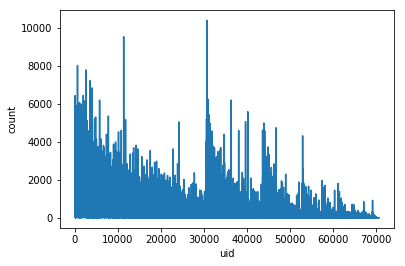

In [18]:
data.groupby("uid")["finish"].count().plot()
plt.ylabel("count")

有个用户看了1w个视频，我们看一下这个值是不是正常的

Text(0.5,0,'video_views')

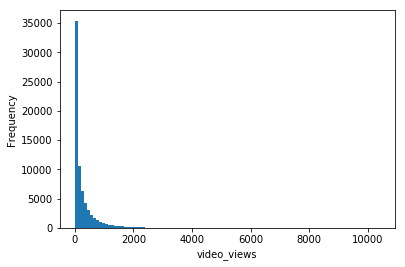

In [21]:
data.groupby("uid")["finish"].count().plot(kind="hist", bins= 100)
plt.xlabel("video_views")

是异常值，但是树模型会自己处理，所以我们不用做处理，接下来我们看一下转化率

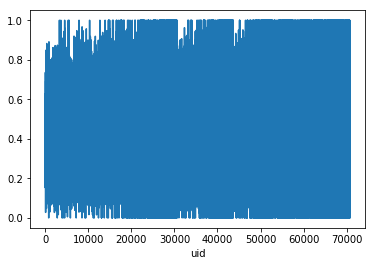

In [22]:
data.groupby("uid")["finish"].mean().plot()

每个uid的finish基本100%，好像实际不是这样，我们hist一下

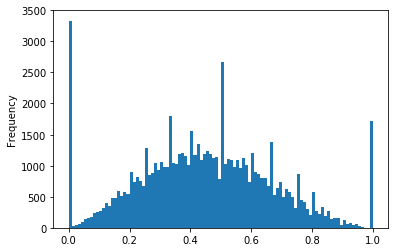

In [24]:
data.groupby("uid")["finish"].mean().plot(kind="hist", bins= 100)

基本呈正太分布，但是有部分异常值，估计是强特

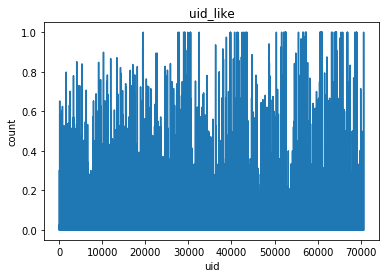

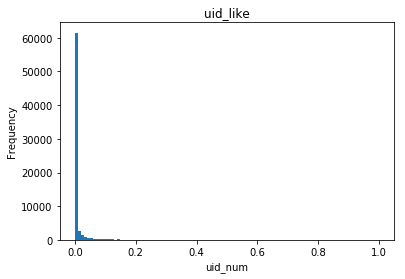

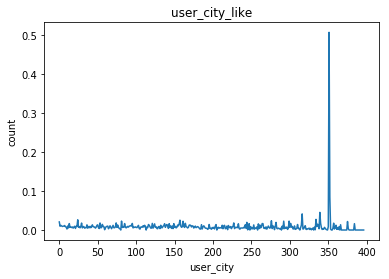

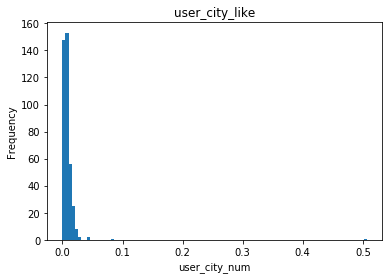

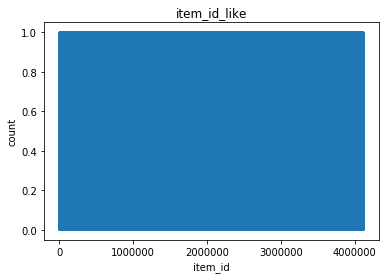

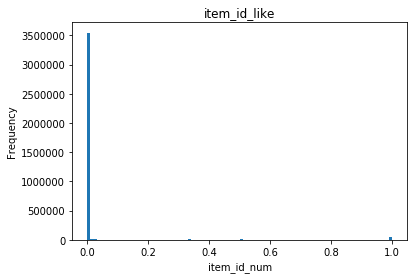

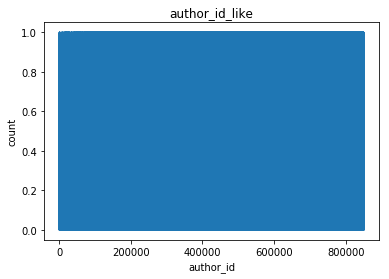

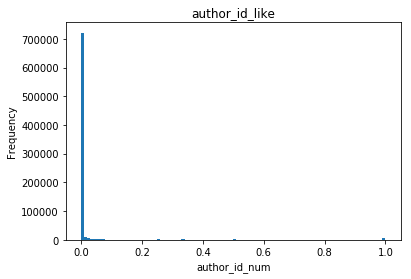

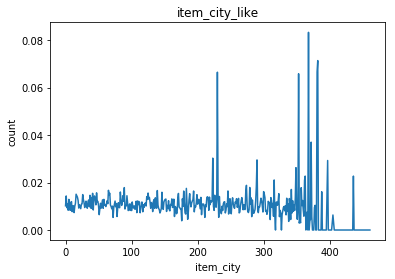

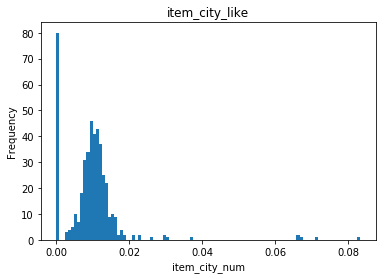

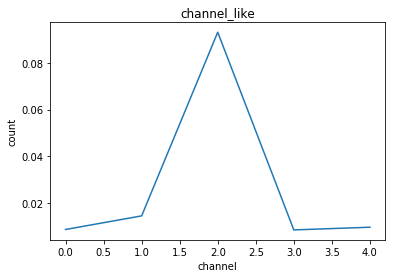

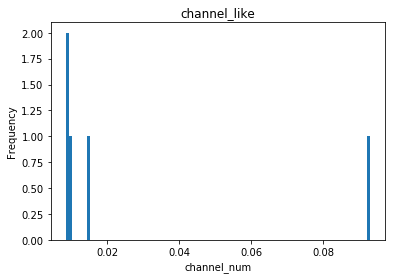

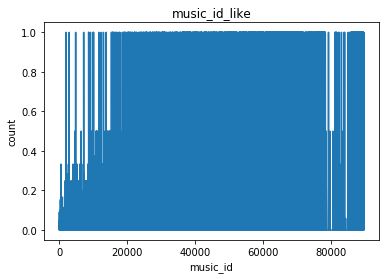

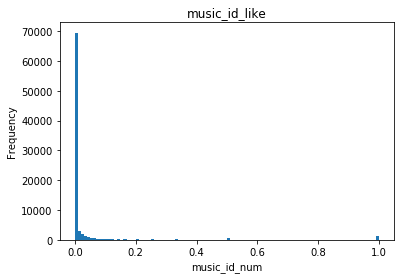

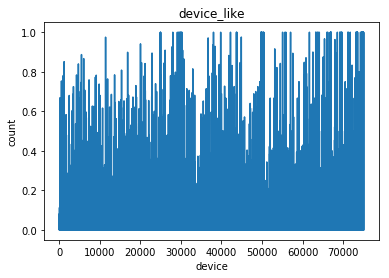

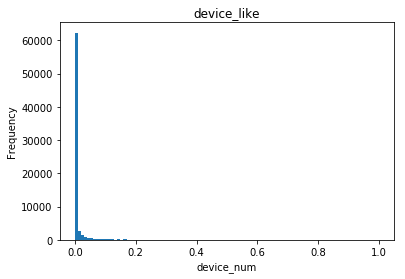

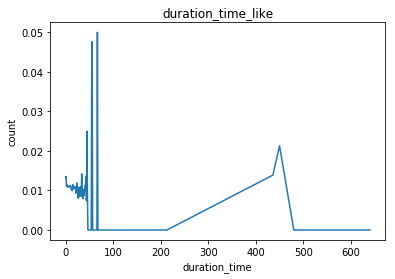

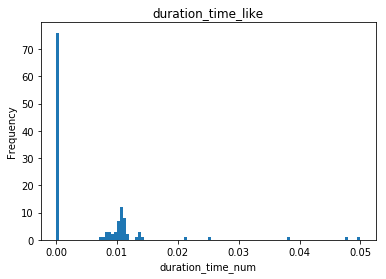

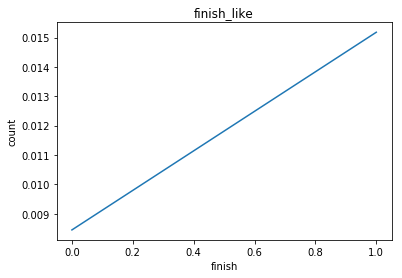

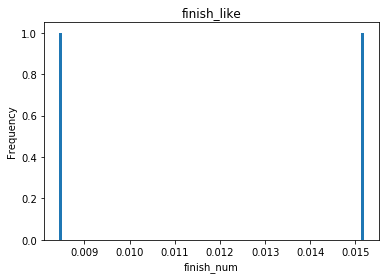

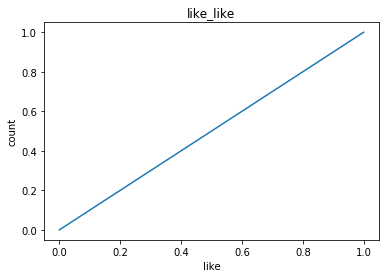

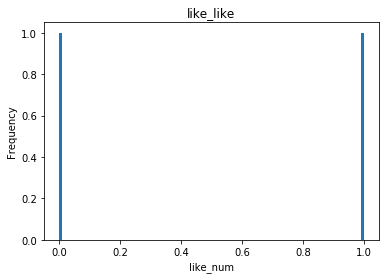

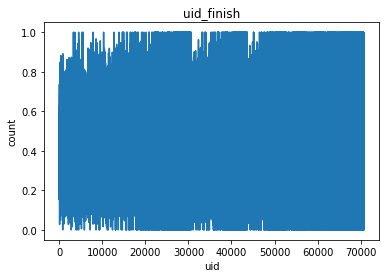

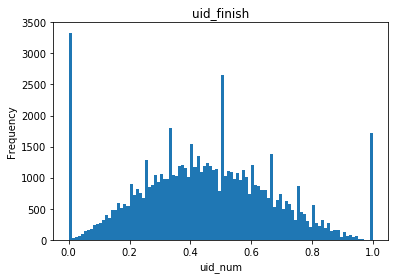

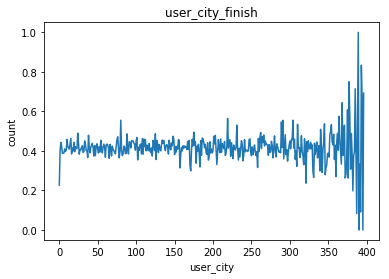

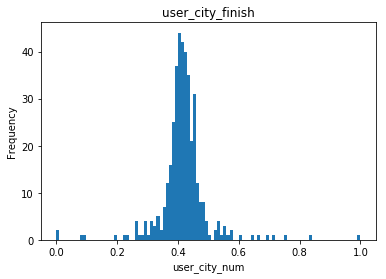

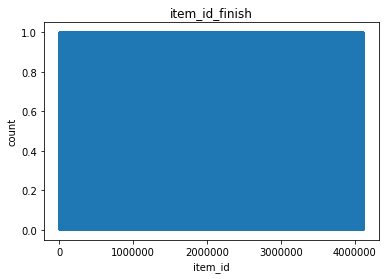

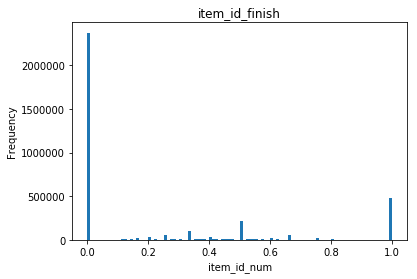

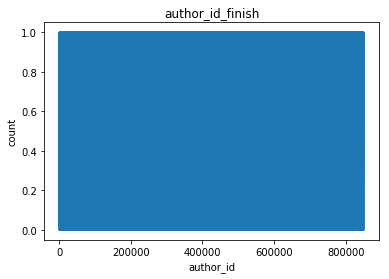

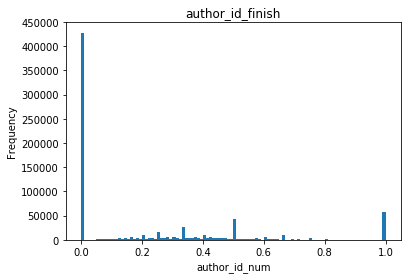

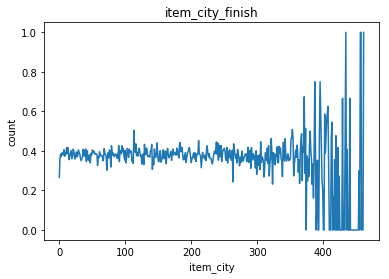

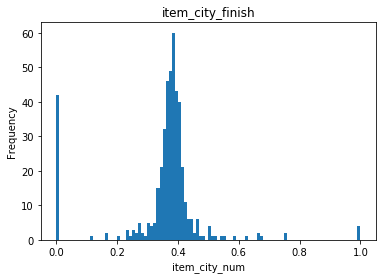

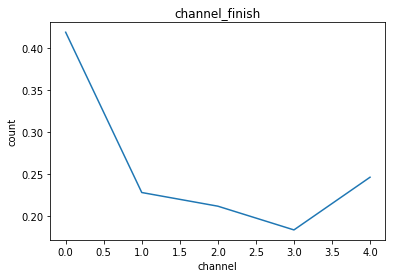

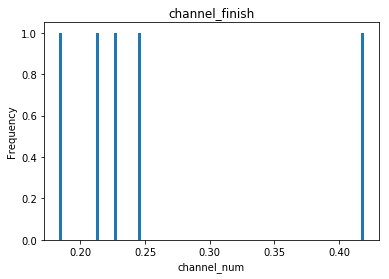

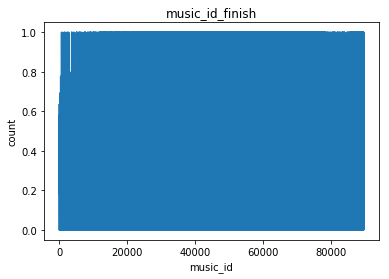

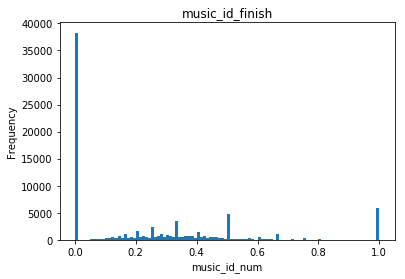

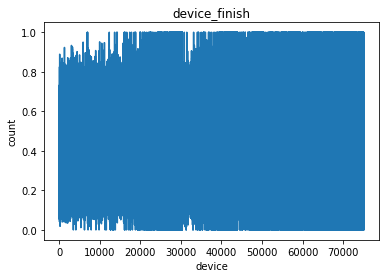

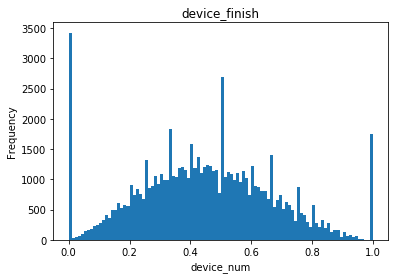

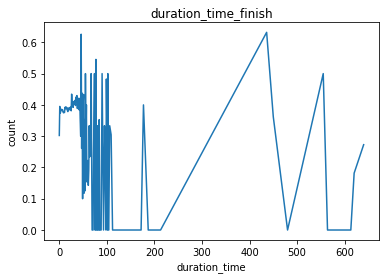

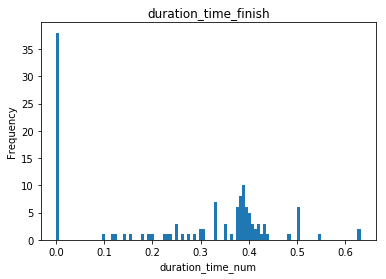

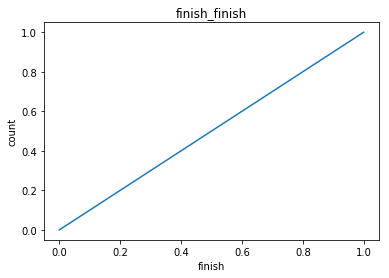

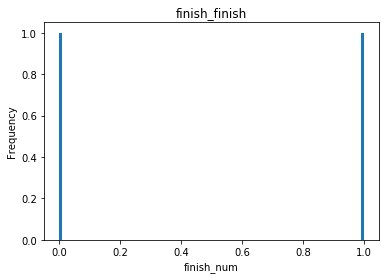

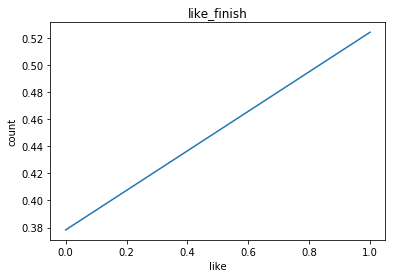

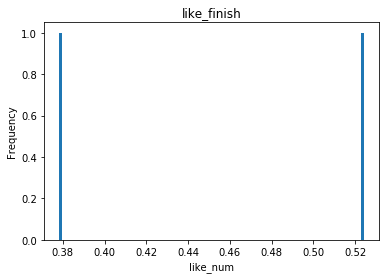

In [27]:
for label in ["like", "finish"]:
    for c in columns:
        data.groupby(c)[label].mean().plot()
        plt.ylabel("count")
        plt.title(c+"_"+label)
        plt.show()
        
        data.groupby(c)[label].mean().plot(kind="hist", bins= 100)
        plt.xlabel(c+"_num")
        plt.title(c+"_"+label)
        plt.show()